<a href="https://colab.research.google.com/github/veronica1013/Data-Science-Core/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_06_Veronica_Isiaho_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

### a) Specyfying the Data Analytic Question
Determining the demographic factors that can be used to establish whether an individual has acess to bank services or not.

### b) Metric of success

To identify the features that can help know whether an individual has acess to bank services using the chi squared test

### c) Understanding the context
Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.
The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

### d) Recording the experimental design
The project entails the use of pandas cross tabulations to get summaries of the different columns.
The chi2_contingency() function will be used to get the chi squared statistics.
The chi squared statistic will be used to determine whether two column features are independent. The null and alternative hypothesis for the chi square test is:
Ho: The features are independnet
Ha: There is a relationship between the features
-- null hypothesis is rejected when p-value is less than 0.05

### e) Relevance of the data
The data provided is relevant to our research question which is to determine the factors that can help predict whether an individual has access to bank services.

## Loading the Libraries

In [77]:
# Import the revevant libraries
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import datetime
import datetime

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt

# importing stats
from scipy import stats


## Reading the Data

In [3]:
# Reading the variables definitions
# Variables url = http://bit.ly/VariableDefinitions

VariableDefinitions = pd.read_csv('http://bit.ly/VariableDefinitions')
VariableDefinitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/FinancialDataset
# ---
#
# Loading the first dataset as sat_2017_df
financial_dataset = pd.read_csv("http://bit.ly/FinancialDataset")


## Checking the Data

In [5]:
# Determining the no. of records in the dataset

financial_dataset.shape

(23524, 13)

In [6]:
# Previewing the top of the dataset
financial_dataset.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
# Previewing the bottom of the dataset
financial_dataset.tail(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatypes
financial_dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## Tidying the Dataset

In [ ]:
# Identify outliers by first looking at the descriptive analysis
# 
financial_dataset.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


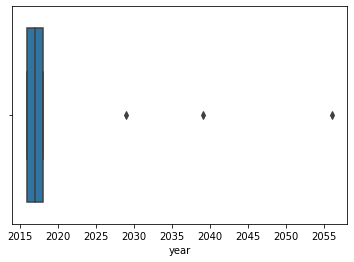

In [ ]:
# Checking for Outliers in the dataset

# year
sns.boxplot(x=financial_dataset['year']);


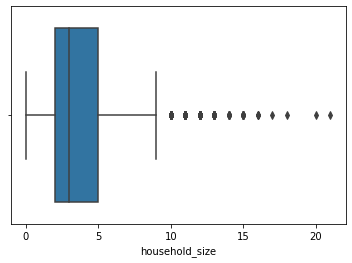

In [ ]:
# Checking for outliers in the dataset
# household
sns.boxplot(x=financial_dataset['household_size']);


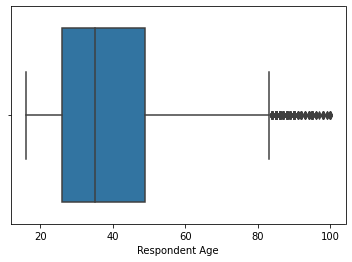

In [ ]:
# Checking for outliers in the dataset
# respondent age
sns.boxplot(x=financial_dataset['Respondent Age']);

In [ ]:
# Checking for Anomalies
#

In [ ]:
# Establishing the outlier years in the year column
for items in financial_dataset['year']:
  if items > 2018:
    print(items)


2029
2056
2039


In [ ]:
financial_dataset.shape

(23524, 13)

In [7]:
# Dropping the outliers
outliers_year = financial_dataset[financial_dataset['year'] > 2018].index
financial_dataset_1= financial_dataset.drop(outliers_year, inplace=True)
financial_dataset.shape

(23521, 13)

In [8]:
# Dropping the outliers in the household_size column
outliers_household_size = financial_dataset[financial_dataset['household_size'] > 8].index
financial_dataset.drop(outliers_household_size, inplace=True)
financial_dataset.shape

(22788, 13)

In [9]:
# Dropping the outliers in the respondent_age column
outliers_respondent_age = financial_dataset[financial_dataset['Respondent Age'] > 80].index
financial_dataset.drop(outliers_respondent_age, inplace=True)
financial_dataset.shape

(22451, 13)

In [10]:
# Identifying the Missing Data in SAT 2017 Dataset
financial_dataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          14
Cell Phone Access         10
household_size            27
Respondent Age            31
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       28
Type of Job               29
dtype: int64

In [11]:
# Dealing with the Missing Data

financial_dataset = financial_dataset.dropna()
financial_dataset.shape

(22276, 13)

In [ ]:
# Checking for duplicate values
financial_dataset.duplicated().sum()

0

In [32]:
# Rename the column names to lower case from upper cases 
# Replace the white spaces between the column names with underscore
 
financial_dataset.columns = financial_dataset.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
financial_dataset.head(1)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


In [33]:
# Rename the columns
financial_dataset.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace = True)
financial_dataset.head(1)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


In [ ]:
# Dropping irrelevant columns

# financial_dataset.drop(['uniqueid'], axis=1, inplace=True)
financial_dataset.head(1)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


In [31]:
# Converting the respondent age and household size data type from float to integer
financial_dataset[['respondent_age', 'household_size']] = financial_dataset[['respondent_age', 'household_size']].astype(int)
financial_dataset.head(1)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


In [ ]:
financial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22276 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     22276 non-null  object
 1   year                        22276 non-null  int64 
 2   uniqueid                    22276 non-null  object
 3   has_a_bank_account          22276 non-null  object
 4   type_of_location            22276 non-null  object
 5   cell_phone_access           22276 non-null  object
 6   household_size              22276 non-null  int64 
 7   respondent_age              22276 non-null  int64 
 8   gender_of_respondent        22276 non-null  object
 9   the_relationship_with_head  22276 non-null  object
 10  marital_status              22276 non-null  object
 11  level_of_educuation         22276 non-null  object
 12  type_of_job                 22276 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.4+ MB


## Exploratory Data Analysis: Univariate Analysis

In [ ]:
# Finding the mode 
financial_dataset.mode()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,1.0,2016.0,uniqueid_1,0.0,0.0,1.0,2.0,30.0,0.0,Head of Household,2.0,3.0,9.0
1,NaN,NaN,uniqueid_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,uniqueid_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,uniqueid_1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,uniqueid_1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,NaN,NaN,uniqueid_993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1622,NaN,NaN,uniqueid_994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1623,NaN,NaN,uniqueid_995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1624,NaN,NaN,uniqueid_996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The country with the highest number of repondents is Rwanda, with a majority living in the rural with a cell phone access but not having a bank account. Most of them were self employed 30 year old females who were married or living together and had their highest level of education as primary education.

In [ ]:
# Mean
print("The mean for the household size and respondent age respectively are: ")
financial_dataset[['household_size', 'respondent_age']].mean().round(2)

The mean for the household size and respondent age respectively are: 


household_size     3.50
respondent_age    38.18
dtype: float64

The average age for the respondents was 38 years while the average household size was 4.

In [ ]:
# Variance
financial_dataset.var()

year                0.712000
household_size      3.927587
respondent_age    243.362122
dtype: float64

It was noted that the data points for the household size were spread out within the mean value of 4 unlike the respondent age was widely spread out from the average age with a variance of 243.36.

In [ ]:
# Standard deviation
print("The standard deviation for the household size and respondent age are:")
financial_dataset.std()

The standard deviation for the household size and respondent age are:


year               0.843801
household_size     1.981814
respondent_age    15.600068
dtype: float64

The household size differs from the groups mean by 1.98 while the respondent age differs from the average mean by 15.6. This means that most of the respondents ages are spread out far from the average age of 38 years

In [ ]:
# Range
maximum_age = financial_dataset['respondent_age'].max()
maximum_age
print(f"The oldest respondent was {maximum_age} years old")

minimum_age = financial_dataset['respondent_age'].min()
minimum_age
print(f"\nThe youngest respondent was {minimum_age} years old")

age_range = maximum_age - minimum_age
age_range
print(f"\nThe age range between the youngest and the " 
f"oldest respondent was: {age_range}")

The oldest respondent was 80 years old

The youngest respondent was 16 years old

The age range between the youngest and the oldest respondent was: 64


In [ ]:
# Skew
financial_dataset.skew()

year              0.064921
household_size    0.515390
respondent_age    0.721119
dtype: float64

Rounding off the skewness values to 1 is an indication of a positive skew. the mean is greater than the mode. The average respondent age was 38 while the mode was 30. On the other hand, the household size had an average mean of 4 while the mode was 2.

In [ ]:
# kurtosis
financial_dataset.kurt()

year             -1.592571
household_size   -0.728949
respondent_age   -0.295951
dtype: float64

A kurtosis value of negative indicates that the fanancial dataset distribution is light. it has no outliers

In [ ]:
# Frequency on the number of respondents with and without phone access
phone_access_frequency = financial_dataset.groupby(['country', 'cell_phone_access'])['country'].count()
phone_access_frequency

country   cell_phone_access
Kenya     No                   1150
          Yes                  4565
Rwanda    No                   1383
          Yes                  6942
Tanzania  No                   2530
          Yes                  3860
Uganda    No                    544
          Yes                  1302
Name: country, dtype: int64

### Overall cell Phone Access

No handles with labels found to put in legend.


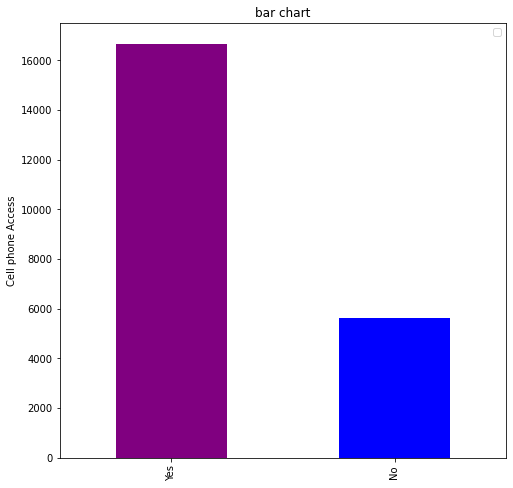

In [25]:
# Overall cell phone access
plt.figure(figsize=(8,8))
plt.title('bar chart')
plt.ylabel('Cell phone Access', fontsize=10)
color=['purple','blue']
plt.legend(fontsize=10)
financial_dataset['cell_phone_access'].value_counts().plot(kind='bar',color=color);

Most respondents had access to mobile phones

### Cell phone access by country

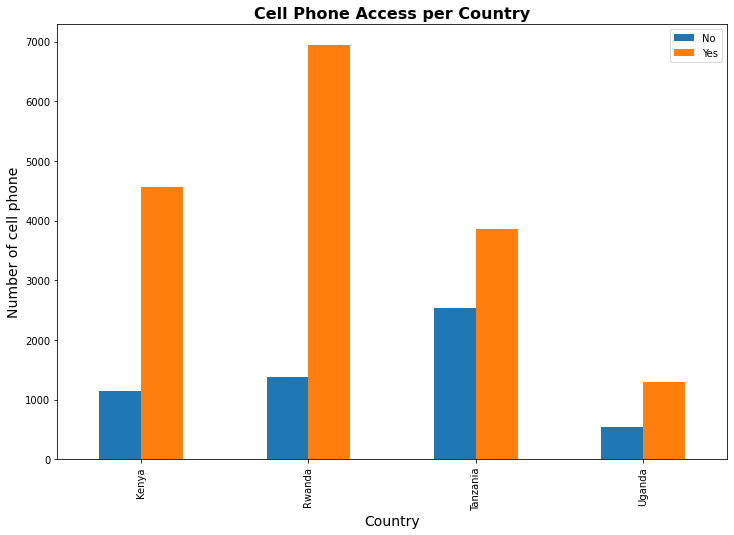

In [ ]:
# Plotting Cell phone access bar graph
financial_dataset.groupby(['country','cell_phone_access']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Cell Phone Access per Country',fontsize=16, fontweight='bold')
plt.xlabel('Country',fontsize=14)
plt.ylabel('Number of cell phone',fontsize=14)
plt.legend(fontsize=10);

Rwanda had the highest number of respondents (almost 7000) with cell phone access followed by Kenya then Tanzania

#### Respondents having bank accounts per country

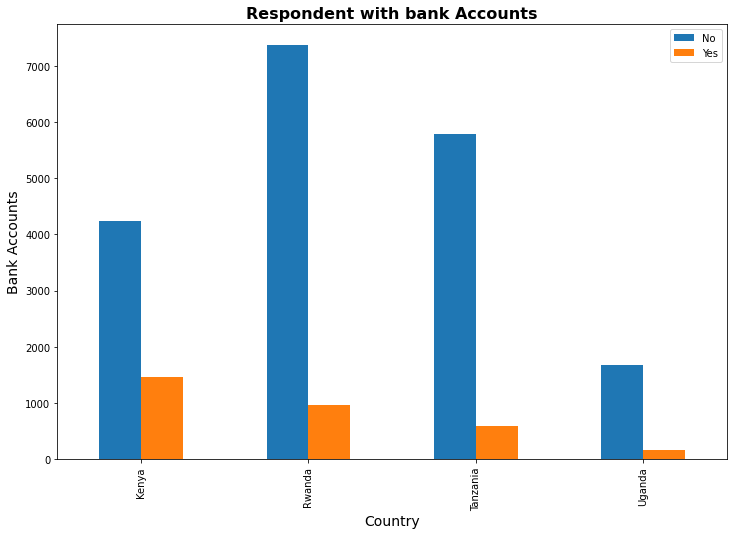

In [ ]:
# number of repondents with bank accounts

financial_dataset.groupby(['country','has_a_bank_account']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Respondent with bank Accounts',fontsize=16, fontweight='bold')
plt.xlabel('Country',fontsize=14)
plt.ylabel('Bank Accounts',fontsize=14)
plt.legend(fontsize=10);

Majority of the Rwandans didn't have bank account despite having high access to cell phones. Kenya had the highest number of respondents with bank accounts but also majority of them didn't have. The number of kenyans without bank accounts was higher than those with bank accounts

### Repondents location

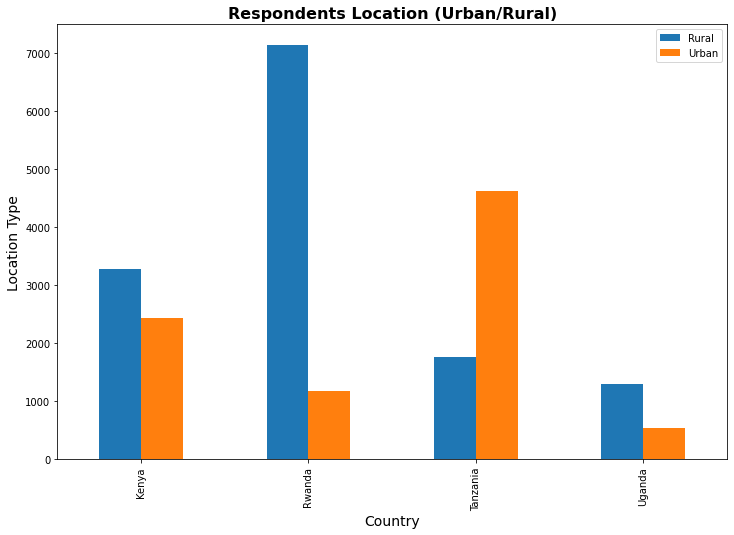

In [ ]:
# location of the respondents

financial_dataset.groupby(['country','type_of_location']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Respondents Location (Urban/Rural)',fontsize=16, fontweight='bold')
plt.xlabel('Country',fontsize=14)
plt.ylabel('Location Type',fontsize=14)
plt.legend(fontsize=10);

It was evident that majority of the respondents in Rwanda lived in Rural areas whereas most of the repondents in Tanzania lived in urban areas.

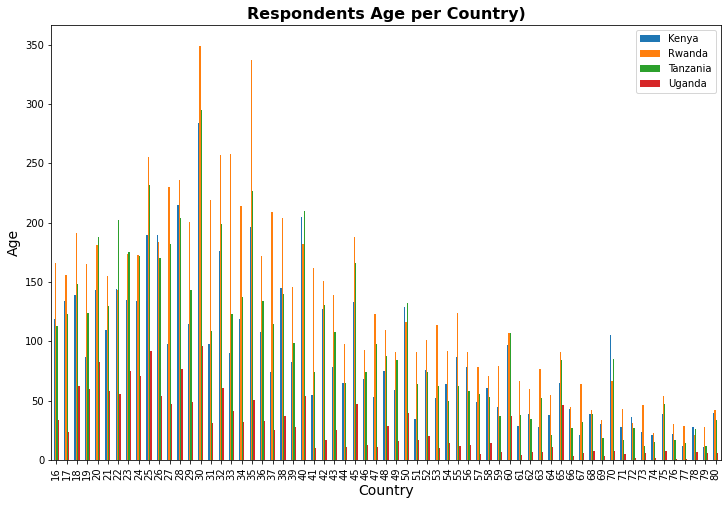

In [ ]:
# respondents age per country
financial_dataset.groupby(['respondent_age', 'country']).respondent_age.count().unstack().plot(kind='bar', figsize=(12,8))

# labels and title
plt.title('Respondents Age per Country)',fontsize=16, fontweight='bold')
plt.xlabel('Country',fontsize=14)
plt.ylabel('Age',fontsize=14)
plt.legend(fontsize=10);

### Number of Respondents per Country per Year

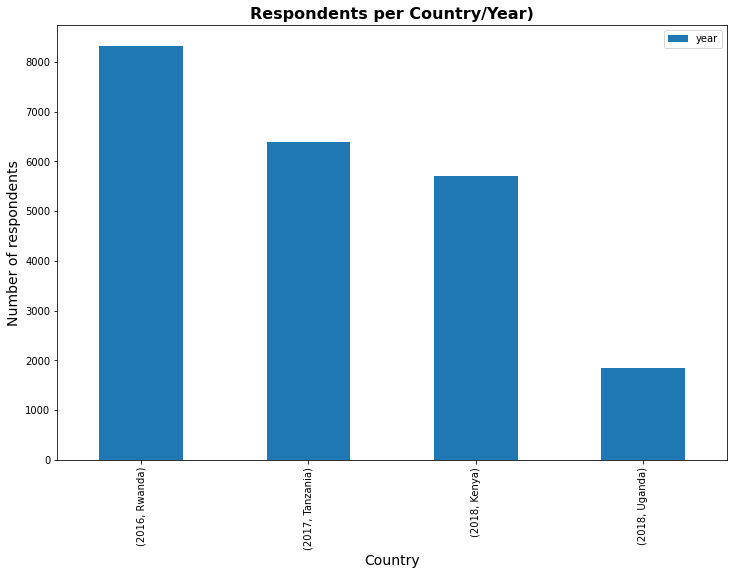

In [ ]:
# Number of respondents per country per year
financial_dataset.groupby(['year', 'country']).year.count().plot(kind='bar', figsize=(12,8))

# labels and title
plt.title('Respondents per Country/Year)',fontsize=16, fontweight='bold')
plt.xlabel('Country',fontsize=14)
plt.ylabel('Number of respondents',fontsize=14)
plt.legend(fontsize=10);

### Respondents with Bank Accounts Overall

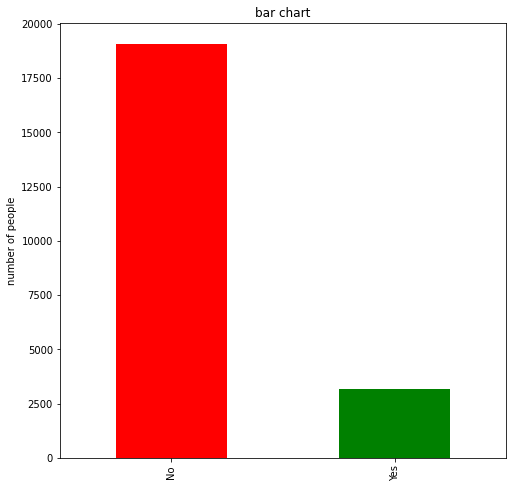

In [15]:
# Has bank accounts overall
plt.figure(figsize=(8,8))
plt.title('bar chart')
plt.ylabel('number of people')
color=['red','green']
financial_dataset['has_a_bank_account'].value_counts().plot(kind='bar',color=color);

# It's noted that most respondents did not have a bank account

### Respondents with Bank Accounts per Year

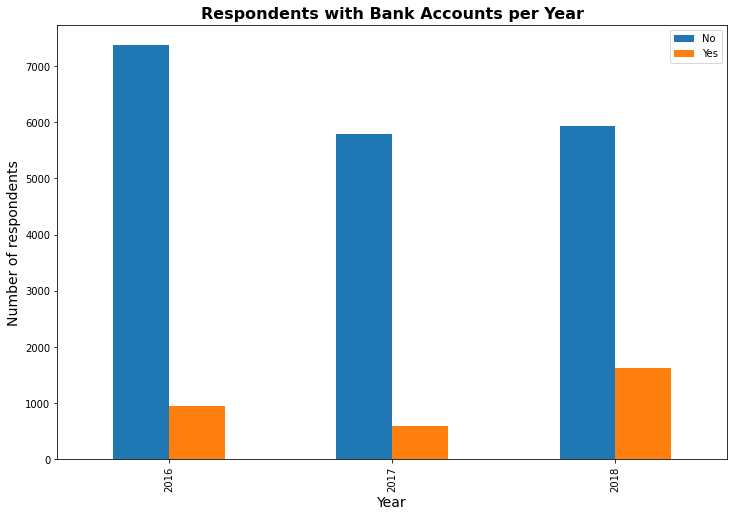

In [ ]:
# Respondents with bank accounts per year
financial_dataset.groupby(['year', 'has_a_bank_account']).respondent_age.count().unstack().plot(kind='bar', figsize=(12,8))

# labels and title
plt.title('Respondents with Bank Accounts per Year',fontsize=16, fontweight='bold')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of respondents',fontsize=14)
plt.legend(fontsize=10);

Most of the respondents didn't have bank accounts in 2016, 2017 and 2018.

### Respondents Education Level per Year

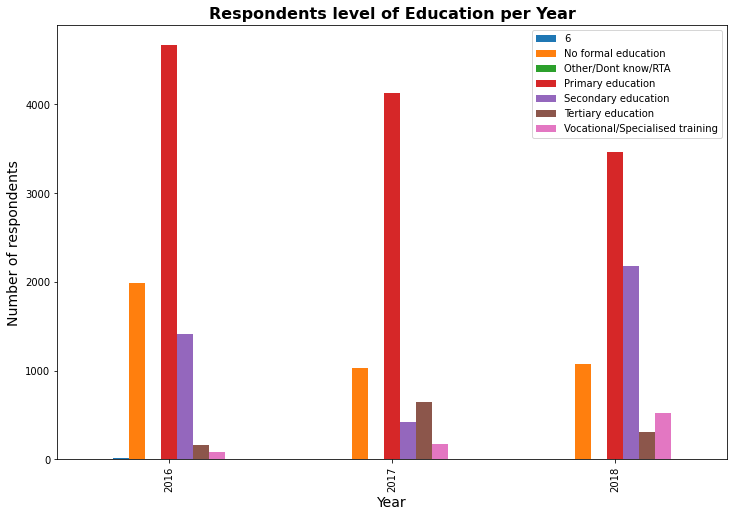

In [ ]:
# education Level per year
financial_dataset.groupby(['year', 'level_of_educuation']).respondent_age.count().unstack().plot(kind='bar', figsize=(12,8))

# labels and title
plt.title('Respondents level of Education per Year',fontsize=16, fontweight='bold')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of respondents',fontsize=14)
plt.legend(fontsize=10);

Most of the respondents had primary level of education across the year under review

### Level of education and bank accounts

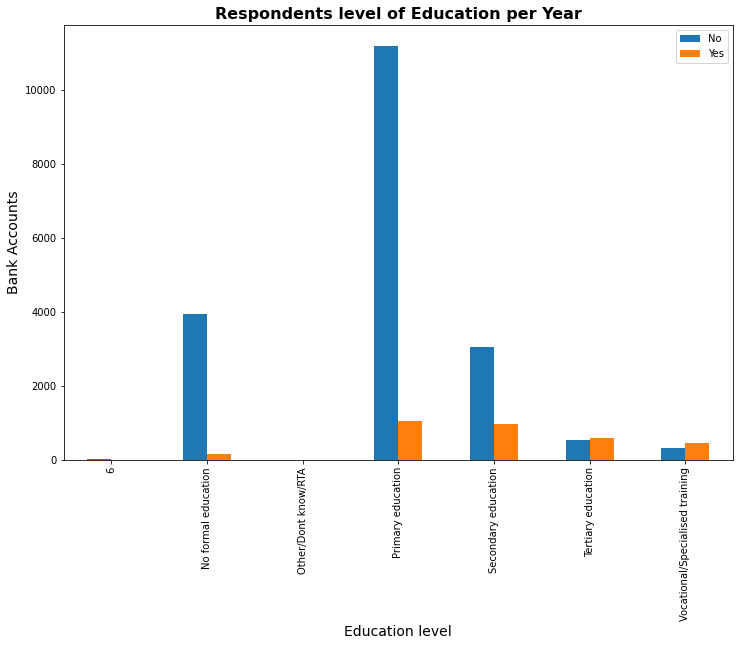

In [ ]:
# Level of Education and Bank Accounts

financial_dataset.groupby(['level_of_educuation', 'has_a_bank_account']).respondent_age.count().unstack().plot(kind='bar', figsize=(12,8))

# labels and title
plt.title('Respondents level of Education per Year',fontsize=16, fontweight='bold')
plt.xlabel('Education level',fontsize=14)
plt.ylabel('Bank Accounts',fontsize=14)
plt.legend(fontsize=10);

Overally, it was evident that most of the primary school level respondents didn't have bank accounts

### Marital status vs Access to bank account

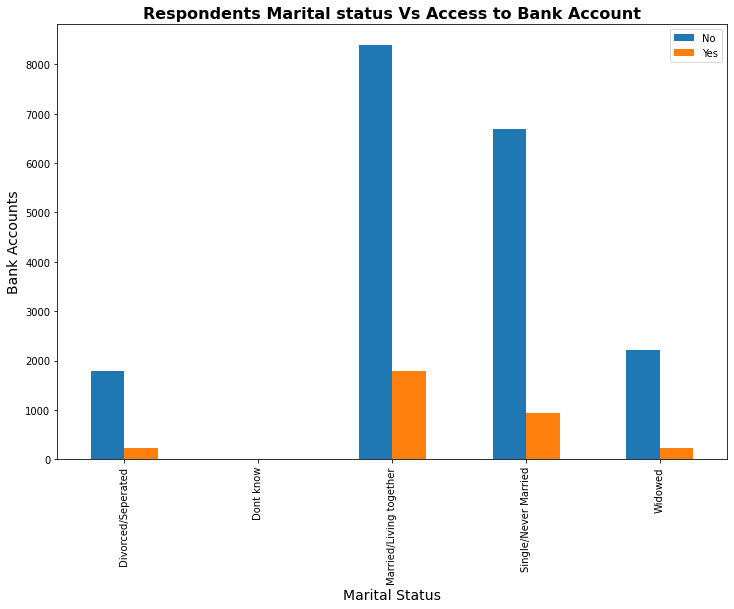

In [ ]:
# Marital status tvs access to bank account
financial_dataset.groupby(['marital_status', 'has_a_bank_account']).respondent_age.count().unstack().plot(kind='bar', figsize=(12,8))

# labels and title
plt.title('Respondents Marital status Vs Access to Bank Account',fontsize=16, fontweight='bold')
plt.xlabel('Marital Status',fontsize=14)
plt.ylabel('Bank Accounts',fontsize=14)
plt.legend(fontsize=10);

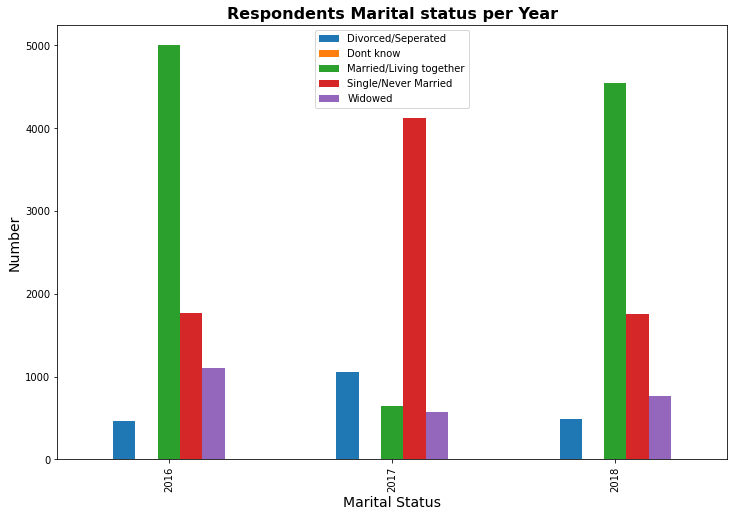

In [ ]:
# Marital status tvs access to bank account
financial_dataset.groupby(['year', 'marital_status',]).year.count().unstack().plot(kind='bar', figsize=(12,8))

# labels and title
plt.title('Respondents Marital status per Year',fontsize=16, fontweight='bold')
plt.xlabel('Marital Status',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10);

Most of the respondents are married/living together but don't have bank accounts. 2016 had the highest number of married respondents followed by the year 2018.

In [17]:
financial_dataset.head(1)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


### Overall location type

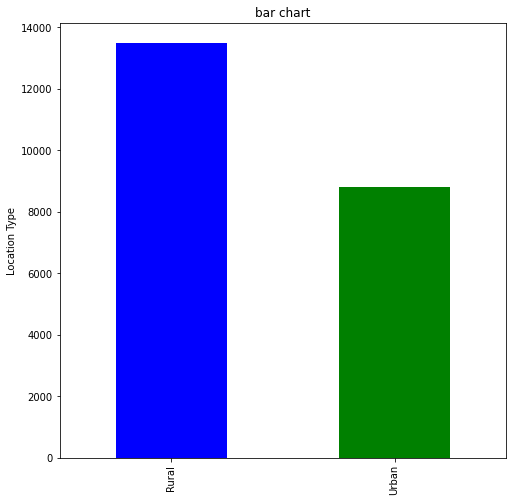

In [18]:
# Resapondents location
plt.figure(figsize=(8,8))
plt.title('bar chart')
plt.ylabel('Location Type')
color=['blue','green']
financial_dataset['type_of_location'].value_counts().plot(kind='bar',color=color);

# It's evident that most respondents reside in the rural areas

### Relationship with the head

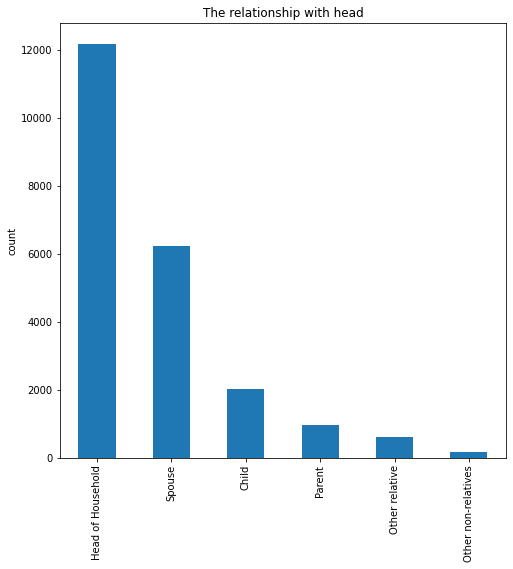

In [36]:
# Relationship with the head
plt.figure(figsize=(8,8))
plt.title('The relationship with head')
plt.ylabel('count')
financial_dataset['the_relationship_with_head'].value_counts().plot(kind='bar');

### Marital status

In [78]:
# marital status
marital_df = financial_dataset['marital_status'].value_counts()
marital_df

Married/Living together    10186
Single/Never Married        7634
Widowed                     2439
Divorced/Seperated          2009
Dont know                      8
Name: marital_status, dtype: int64

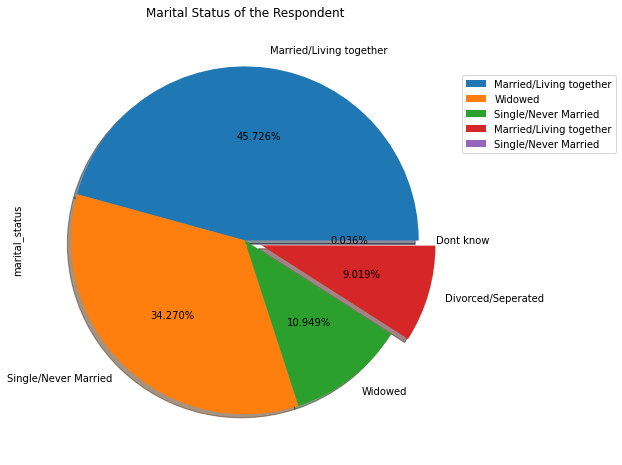

In [69]:
# Plot a pie chart for marital status

plt.figure(figsize=(8,8))
plt.title('Marital Status of the Respondent')
explode=0,0,0,0.1,0
financial_dataset['marital_status'].value_counts().plot(kind='pie', startangle=360,shadow=True, explode=explode,autopct='%1.3f%%');
plt.legend(financial_dataset['marital_status'],loc = (1,0.7));
# Most respondnets were married/ living together

## Bivariate Analysis

The main aim was to determine the demographic factors that can be used to establish whether an individual has acess to bank services. Will therefore compare the 'has bank account variable' with other factors using the chi-squared test

### Has Bank account and location

In [71]:
# Make a crosstab
pd.crosstab(financial_dataset['type_of_location'],financial_dataset['has_a_bank_account'],margins=True,margins_name='Total')


has_a_bank_account,No,Yes,Total
type_of_location,,,
Rural,11882,1594,13476
Urban,7205,1595,8800
Total,19087,3189,22276


Majority of the respondnents in rural areas did not have bank accounts. Also the proportion of those respondents who had bank accounts in the urban and rural areas was not that different.

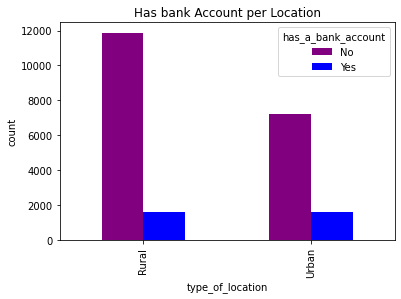

In [75]:
# Plotting a bar graph for location and bank account
bank_account_location = pd.crosstab(financial_dataset['type_of_location'],financial_dataset['has_a_bank_account'])

bank_account_location.plot.bar(color=color)
plt.ylabel('count')
plt.title("Has bank Account per Location");


The number of respondents without bank accounts was higher in rural areas than in urban areas. similarly, thise with bank accounts were residing from urban areas than in rural areas although the difference is not big

In [79]:
# chis stattistics between location and those with bank accounts
stats.chi2_contingency(bank_account_location)


(171.55342545137012,
 3.387596563950349e-39,
 1,
 array([[11546.79529539,  1929.20470461],
        [ 7540.20470461,  1259.79529539]]))

From the above results, the chi-squared statistic was 171.6 and a p-value that is less than the 0.05 threshold. Therefore the null hypothesis is rejected because there is no dependence between the location and accesibily of bank services.
The result however implies that there is a relationship between the location of the respondent and the the accesibility of bank services

### Relationship between Has bank account and country 

In [81]:
# Create a crosstab for has bank account and country
pd.crosstab(financial_dataset.country,financial_dataset['has_a_bank_account'],margins=True,margins_name='total')


has_a_bank_account,No,Yes,total
country,,,
Kenya,4245,1470,5715
Rwanda,7367,958,8325
Tanzania,5793,597,6390
Uganda,1682,164,1846
total,19087,3189,22276


It is evident that Rwanda had most of the respondnents with bank accounts, followed by Tanzania at 6,390 while uganda had few respondents with bank accounts 


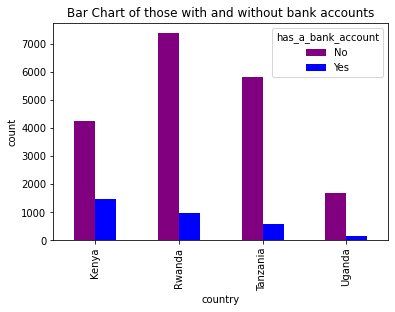

In [82]:
# plot a bar graph with those who have/don't have bank accounts
df = pd.crosstab(financial_dataset.country,financial_dataset['has_a_bank_account'])

df.plot.bar(color=color)
plt.ylabel('count')
plt.title('Bar Chart of those with and without bank accounts');


Rwanda wasthe country with majority of the respondents with no bank accounts followed by Tanzania then Kenya. overall, the number of respondents who didn't have bank accounts was higher than those who had

In [83]:
# chi-squared statistics for those with bank accounts and country
stats.chi2_contingency(df)

(832.8874485343508,
 3.1881756775409666e-180,
 3,
 array([[4896.84885078,  818.15114922],
        [7133.20501885, 1191.79498115],
        [5475.21682528,  914.78317472],
        [1581.72930508,  264.27069492]]))

The chi-squared statistic is 832, the degrees of freedom is 3 and the p-values is 3.12. The p-value is greater than the threshold of 0.05. therefore, we'll fail to reject the null hypothesis that the country and acess to bank services are independent

### Scatter Plots

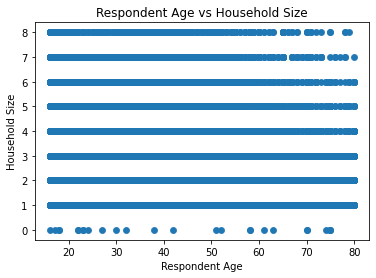

In [ ]:
# Respondent age and household size

# Using Pandas: Plotting our scatterplot to compare the variables
financial_dataset.plot(x = 'respondent_age', y = 'household_size', kind='scatter')

# Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = financial_dataset["respondent_age"], y = financial_dataset["household_size"], fit_reg=False)

# Giving our scatterplot a title
plt.title('Respondent Age vs Household Size')

# Labelling our x axis
plt.xlabel('Respondent Age')

# Labelling our y axis
plt.ylabel('Household Size');

# The scatterplot graph shows that the variable respondent age is strongly correlated to the household size.

#### Correlation

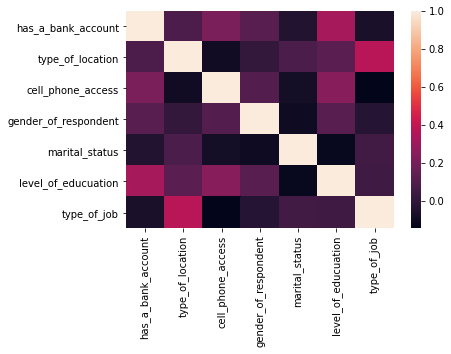

In [ ]:
# Heatmap to show if there's correlation
hsizeage = financial_dataset[['has_a_bank_account', 'type_of_location',
       'cell_phone_access', 
       'gender_of_respondent','marital_status',
       'level_of_educuation', 'type_of_job']]
sns.heatmap(hsizeage.corr(),annot=False);

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = financial_dataset["respondent_age"].corr(financial_dataset["household_size"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = financial_dataset["respondent_age"].corr(financial_dataset["household_size"]) 
print(coeff)

# The respondent age and household size are inversely correlated

-0.10241518313031248
-0.10241518313031248


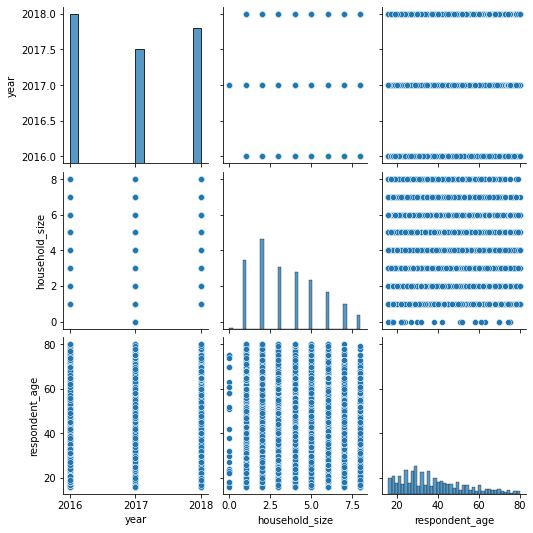

In [84]:
# Establishing correlation between variables
sns.pairplot(financial_dataset);


It is evident that there's no correlation between the variables.

### Relationship between location type vis a vis age and household size

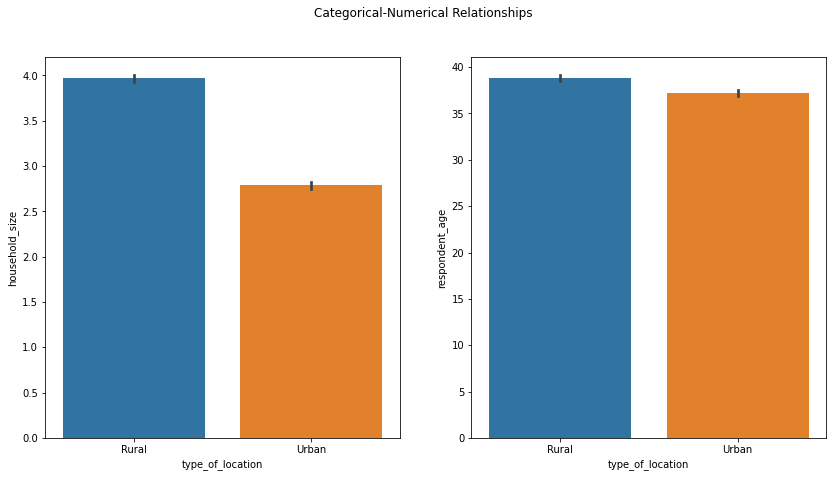

In [93]:
# Categorical relationship between location, age and household
fig, (a,b) = plt.subplots(1,2, figsize=(14, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= financial_dataset['type_of_location'], y= financial_dataset['household_size'], ax=a)
sns.barplot(x= financial_dataset['type_of_location'], y= financial_dataset['respondent_age'], ax=b);


Rural areas had an average of 4 people per house while urban areas had an average mean of 2.8.  The ages were also almost similar between 37 - 39 years.

### Relationship between Gender, Household and age

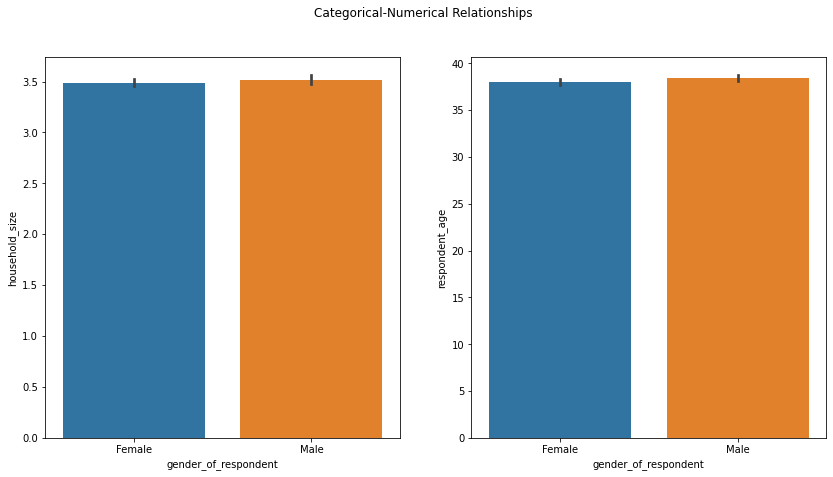

In [95]:
# Comparison between Gender, Household and age
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= financial_dataset['gender_of_respondent'], y= financial_dataset['household_size'], ax=ax1)
sns.barplot(x= financial_dataset['gender_of_respondent'], y= financial_dataset['respondent_age'], ax=ax2);


There was no statistically significance difference between age and household size when compared to gender 

### Comparison between relationship with head and household size/age

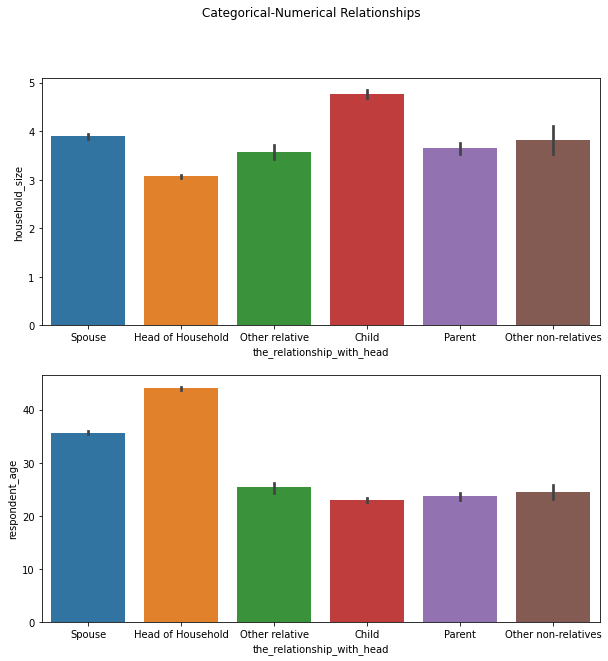

In [96]:
# Comparison between relationship with head and household size/age
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10, 10))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= financial_dataset['the_relationship_with_head'], y= financial_dataset['household_size'], ax=ax1)
sns.barplot(x= financial_dataset['the_relationship_with_head'], y= financial_dataset['respondent_age'], ax=ax2);


The households with average of 3 members had most respondents being the Head of the household whereas those with an average over 4 had children as the most respondents. Respondents with an average of over 40 years tended to be the heads of the house.

### Comparison between marital status and household size/age

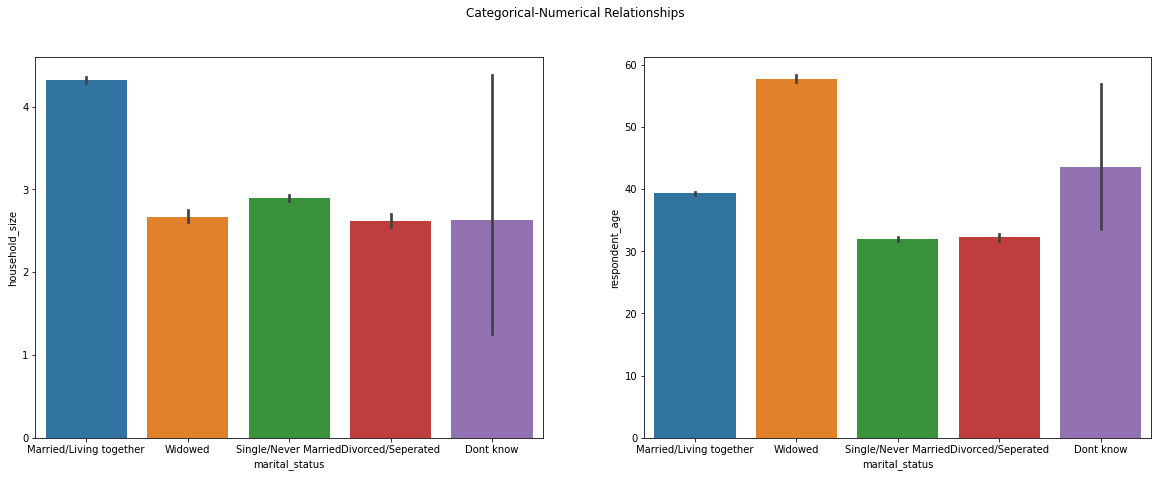

In [97]:
# Comparison between marital status and household size/age
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= financial_dataset['marital_status'], y= financial_dataset['household_size'], ax=ax1)
sns.barplot(x= financial_dataset['marital_status'], y= financial_dataset['respondent_age'], ax=ax2);



Households with an average of over 4 people were largely dominated by married/living together couples while those with an average age approaching 60 were dominated by widowed people.

### Relationship between job type and household size/age

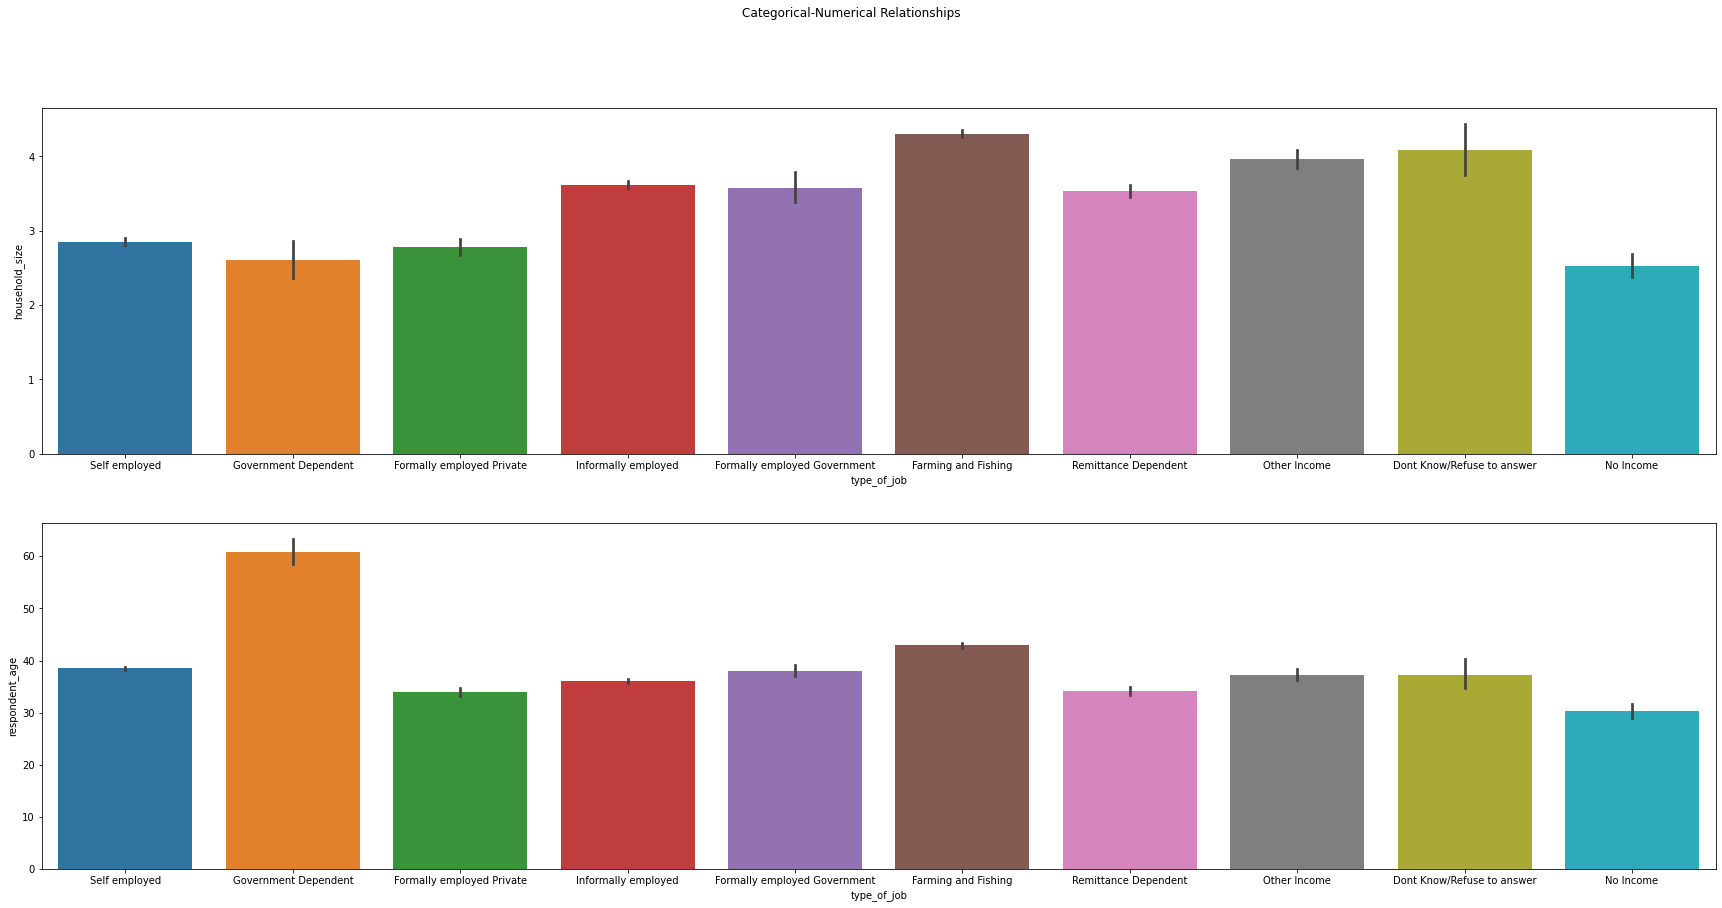

In [98]:
# Relationship between job type and household size/age
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(30, 14))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= financial_dataset['type_of_job'], y= financial_dataset['household_size'], ax=ax1)
sns.barplot(x= financial_dataset['type_of_job'], y= financial_dataset['respondent_age'], ax=ax2);


Bigger households largely depended on farming and fishing while the elderly (60yrs) largely depended on the Government for their livelihood.

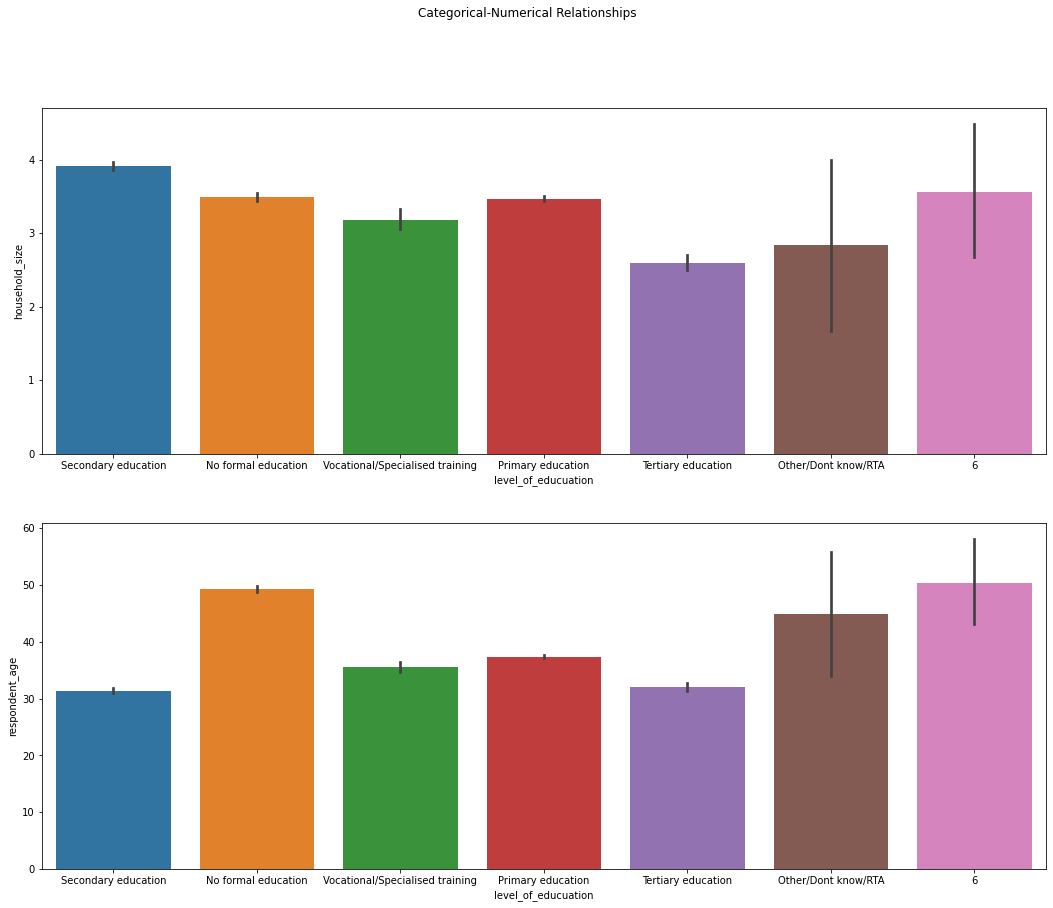

In [99]:
# Comparison between education level and household size/age
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(18, 14))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= financial_dataset['level_of_educuation'], y= financial_dataset['household_size'], ax=ax1)
sns.barplot(x= financial_dataset['level_of_educuation'], y= financial_dataset['respondent_age'], ax=ax2);


Households with 4 people were dominated by Secondary education recipients whereas people approaching 50 years largely have no formal education.

In [94]:
financial_dataset.head(1)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


## Multivariate Analysis

In [86]:
financial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22276 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     22276 non-null  object
 1   year                        22276 non-null  int64 
 2   uniqueid                    22276 non-null  object
 3   has_a_bank_account          22276 non-null  object
 4   type_of_location            22276 non-null  object
 5   cell_phone_access           22276 non-null  object
 6   household_size              22276 non-null  int64 
 7   respondent_age              22276 non-null  int64 
 8   gender_of_respondent        22276 non-null  object
 9   the_relationship_with_head  22276 non-null  object
 10  marital_status              22276 non-null  object
 11  level_of_educuation         22276 non-null  object
 12  type_of_job                 22276 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.4+ MB


In [108]:
# Data for label encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
financial_encoding = financial_dataset.copy(deep=True)
financial_encoding['country']=financial_encoding['country'].astype('category')
financial_encoding['type_of_location']=financial_encoding['type_of_location'].astype('category')
financial_encoding['cell_phone_access']=financial_encoding['cell_phone_access'].astype('category')
financial_encoding['gender_of_respondent']=financial_encoding['gender_of_respondent'].astype('category')
financial_encoding['marital_status']=financial_encoding['marital_status'].astype('category')
financial_encoding['level_of_educuation']=financial_encoding['level_of_educuation'].astype('category')
financial_encoding['type_of_job']=financial_encoding['type_of_job'].astype('category')
financial_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22276 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   country                     22276 non-null  category
 1   year                        22276 non-null  int64   
 2   uniqueid                    22276 non-null  object  
 3   has_a_bank_account          22276 non-null  object  
 4   type_of_location            22276 non-null  category
 5   cell_phone_access           22276 non-null  category
 6   household_size              22276 non-null  int64   
 7   respondent_age              22276 non-null  int64   
 8   gender_of_respondent        22276 non-null  category
 9   the_relationship_with_head  22276 non-null  object  
 10  marital_status              22276 non-null  category
 11  level_of_educuation         22276 non-null  category
 12  type_of_job                 22276 non-null  category
dtypes: category(7), 

### Categorical Data

In [110]:
# Data for label encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
#financial_encoding = financial_dataset.copy(deep=True)
financial_encoding['country']=lb.fit_transform(financial_encoding['country'])
financial_encoding['type_of_location']=lb.fit_transform(financial_encoding['type_of_location'])
financial_encoding['cell_phone_access']=lb.fit_transform(financial_encoding['cell_phone_access'])
financial_encoding['gender_of_respondent']=lb.fit_transform(financial_encoding['gender_of_respondent'])
financial_encoding['marital_status']=lb.fit_transform(financial_encoding['marital_status'])
financial_encoding['level_of_educuation']=lb.fit_transform(financial_encoding['level_of_educuation'])
financial_encoding['type_of_job']=lb.fit_transform(financial_encoding['type_of_job'])
financial_encoding.head(3)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,0,2018,uniqueid_1,Yes,0,1,3,24,0,Spouse,2,4,9
1,0,2018,uniqueid_2,No,0,0,5,70,0,Head of Household,4,1,4
2,0,2018,uniqueid_3,Yes,1,1,5,26,1,Other relative,3,6,9


In [112]:
# drop the columns that won't be used
x = financial_encoding.drop(['has_a_bank_account', 'uniqueid'], axis= 1) # features
y = financial_encoding['has_a_bank_account'] #target variable


In [118]:
# Split the data into train and test sets

from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [114]:
# view the x_ train data
x_train.head(3)

,country,year,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
10912,1,2016,0,0,6,49,1,Head of Household,2,3,5
11709,1,2016,0,0,4,30,0,Spouse,2,1,8
15924,2,2017,1,0,2,40,0,Spouse,3,1,9


In [116]:
# view the y_train
y_train.head(3)

10912    No
11709    No
15924    No
Name: has_a_bank_account, dtype: object

The x-train and y_train both have similar index

In [104]:
# Data for label encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
financial_encoding = financial_dataset.copy(deep=True)
financial_encoding['country']=lb.fit_transform(financial_dataset['country'].astype(str))
financial_encoding['type_of_location']=lb.fit_transform(financial_dataset['type_of_location'].astype(str))
financial_encoding['cell_phone_access']=lb.fit_transform(financial_dataset['cell_phone_access'].astype(str))
financial_encoding['gender_of_respondent']=lb.fit_transform(financial_dataset['gender_of_respondent'].astype(str))
financial_encoding['marital_status']=lb.fit_transform(financial_dataset['marital_status'].astype(str))
financial_encoding['level_of_educuation']=lb.fit_transform(financial_dataset['level_of_educuation'].astype(str))
financial_encoding['type_of_job']=lb.fit_transform(financial_dataset['type_of_job'].astype(str))
financial_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22276 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     22276 non-null  int64 
 1   year                        22276 non-null  int64 
 2   uniqueid                    22276 non-null  object
 3   has_a_bank_account          22276 non-null  object
 4   type_of_location            22276 non-null  int64 
 5   cell_phone_access           22276 non-null  int64 
 6   household_size              22276 non-null  int64 
 7   respondent_age              22276 non-null  int64 
 8   gender_of_respondent        22276 non-null  int64 
 9   the_relationship_with_head  22276 non-null  object
 10  marital_status              22276 non-null  int64 
 11  level_of_educuation         22276 non-null  int64 
 12  type_of_job                 22276 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 3.0+ MB


In [ ]:
financial_dataset['has_a_bank_account']=lb.fit_transform(financial_dataset['has_a_bank_account'].astype(str))

## Implementing the Solution

In [126]:
# check the number of respondents with bank accounts
Bank_Account = financial_dataset[financial_dataset.has_a_bank_account == 'Yes']
Bank_Account.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,0,2018,uniqueid_1,Yes,0,1,3,24,0,Spouse,2,4,9
2,0,2018,uniqueid_3,Yes,1,1,5,26,1,Other relative,3,6,9
8,0,2018,uniqueid_9,Yes,0,1,3,54,1,Head of Household,2,4,1
11,0,2018,uniqueid_12,Yes,0,1,3,69,1,Head of Household,2,4,7
17,0,2018,uniqueid_18,Yes,0,1,6,27,0,Head of Household,2,4,9


In [127]:
# Count the number of respondents with bank accounts
Bank_Account.country.value_counts()

0    1470
1     958
2     597
3     164
Name: country, dtype: int64

In [128]:
# households with bank accounts
Bank_Account.household_size.value_counts()


1    664
2    617
3    498
4    469
5    410
6    268
7    177
8     85
0      1
Name: household_size, dtype: int64

Households with less people have more banking access. 

In [130]:
# comparison of age of respondents against having a bank account
Bank_Account.respondent_age.value_counts()


30    174
35    131
28    125
32    125
40    122
     ... 
79      7
78      7
17      7
77      6
16      5
Name: respondent_age, Length: 65, dtype: int64

It is evident that the respondents between 28 - 40 years old have more banking access

In [131]:
# Gender and having bank account
Bank_Account.gender_of_respondent.value_counts()


1    1753
0    1436
Name: gender_of_respondent, dtype: int64

In [134]:
# Relation with head 
Bank_Account.the_relationship_with_head	.value_counts()


Head of Household      2191
Spouse                  678
Child                   180
Other relative           64
Parent                   57
Other non-relatives      19
Name: the_relationship_with_head, dtype: int64

It is noted that the head of the household have more access to bank account

In [135]:
# marital status and bank accounts
Bank_Account.marital_status.value_counts()

# Married/Living together people have more bank accounts

2    1796
3     940
0     228
4     223
1       2
Name: marital_status, dtype: int64


it is noted that the number of males respondents who have bank accounts are more than the females with have bank accounts

In [137]:
Bank_Account.head(2)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,0,2018,uniqueid_1,Yes,0,1,3,24,0,Spouse,2,4,9
2,0,2018,uniqueid_3,Yes,1,1,5,26,1,Other relative,3,6,9


In [138]:
# Education level and bank accounts
Bank_Account.level_of_educuation.value_counts()


3    1047
4     954
5     579
6     446
1     152
2       6
0       5
Name: level_of_educuation, dtype: int64

People with some form of education have more acces to bank accounts

In [140]:
# Bank account and year

Bank_Account.type_of_job.value_counts()

# It's noted that type of job affects the banking access

9    826
1    607
3    560
5    432
2    292
8    228
7    178
4     39
0     14
6     13
Name: type_of_job, dtype: int64

In [141]:
# bank account and year
Bank_Account.year.value_counts()


2018    1634
2016     958
2017     597
Name: year, dtype: int64

The access to banking facility has improved over the years from 597 in 2017, 958 in 2016 and 1634 in 2018

Rwanda had the highest number of respondents (6,942) with phone access but a majority of them didn't have bank accounts. Kenya was second with highest number of respondents (4,565) with cell phone access with quite a huge number not having bank accounts as detalied below:  

country   cell_phone_access
Kenya     No                   1150
          Yes                  4565
Rwanda    No                   1383
          Yes                  6942
Tanzania  No                   2530
          Yes                  3860
Uganda    No                    544
          Yes                  1302
It was noted that majority of the respo of the respondents who didn't have access to bank accounts had primary level education and most of them lived in rural areas with Rwanda leading having more than 7,000 responses. Rwanda report a total of over 4,800 respondents with no bank accounts.



## Challenging the solution

> Having data collected from four different country's and in different year's, it would have been better to have data from each country in all the fours years for fair comparison and prediction.

Majority of the data was from Rwanda, then Tanzania and followed by Kenya and finaaly uganda. having such disparity in sample size, the results seemed to be biased towards Rwanda with majority of the respondents having primary education, self employed, doing fishing and having no bank accounts yet they have cell phone access. This was also the main reason why rwanda had the modal age of 30 and having a household modal value of 2.

Despite the data biasness to Rwanda, it was noted that in the year 2016, the commercial banks could use the mobile access to tap into the Rwandan population and ensure that there's financial inclusion.

The opportunity could help the respondents in Rwanda to grow their business as most of them are self employed and practice fish farming. The banks could also give them funds to enable them have value addition to their products. 






## Recommendations

Banks should leverage on the high penetration of mobile phones across the region to increase the banked population
Education and knowledge about money and banking should be increased. Possibly in the primary school curriculum - This is the common place to reach most of the population
Farmers, self employed people and people in the informal sector should also be targeted by future marketing campaigns
There is a great potential for growth of the formal banking sector
Interestingly, the uptake of formal banking is equal both in rural and urban areas despite more of the skew being towards the rural population. Shows that marketing campaigns should focus their attention to the rural population.

## Follow up questions

### a). Did we have the right data?

Yes we had the right data. However, majority of the data was biased to one country thus influencing the results.

### b). Do we need other data to answer our question?

No. We don't need other data to answer our question.

### c). Did we have the right question?

Yes we had the right question. The main objective was to predict which individuals wereto use bank accounts and it was noted that the self employed respondents in the rural areas were the main target as the market was untapped with a majority in Rwanda, followed by Tanzanians.